In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vector_list = []
with open("haemolytic.txt", "r") as f:
    print("fields are: " + f.readline())
    for line in f:
        vector_list.append(list(map(lambda x: float(x.replace(',', '.')), line.split())))

fields are: hmgl	blr	class



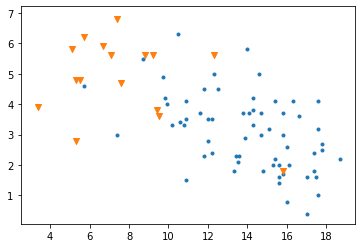

In [3]:
data = np.stack(vector_list)
# show 1 label
plt.scatter(data[data[:, 2] == 1 ][:, 0], data[data[:, 2] == 1 ][:, 1], marker=".")
# show 2 label
plt.scatter(data[data[:, 2] == 2 ][:, 0], data[data[:, 2] == 2 ][:, 1], marker="v")

In [4]:
from sklearn.svm import SVC

In [16]:
clf = SVC(gamma='auto')
X = data[:, :2]
y = data[:, 2]
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

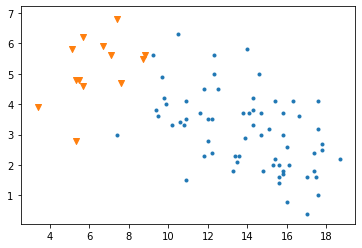

In [17]:
# show predicted data
p_c = clf.predict(data[:, :2])
p_c = np.column_stack((p_c,p_c))
p_data = np.hstack((data[:, :2], p_c))[:, :3]
# show 1 label
plt.scatter(p_data[p_data[:, 2] == 1 ][:, 0], p_data[p_data[:, 2] == 1 ][:, 1], marker=".")
# show 2 label
plt.scatter(p_data[p_data[:, 2] == 2 ][:, 0], p_data[p_data[:, 2] == 2 ][:, 1], marker="v")

In [18]:
# print accuracy
clf.score(data[:, :2], data[:, 2])

0.9113924050632911